In [1]:
!pip3 install pandas-gbq

In [1]:
import pandas as pd
import json
from google.cloud import storage
from pyspark.sql import SparkSession
import re
import ast
from google.cloud import bigquery
import numpy as np

In [5]:
def ingest_CDR_data(INPUT_PATH, OUTPUT_PATH):
    data = pd.read_json(INPUT_PATH, lines=True)
    source_no = []
    dest_no = []
    start_time = []
    duration = []
    source_operator = []
    dest_operator = []
    source_location = []
    dest_location = []
    disposition = []
    sms = []
    for lab, row in data.iterrows():
        source_no.append(row['source']['msisdn'])
        dest_no.append(row['destination']['msisdn'])
        start_time.append(row['root']['start_time'])
        duration.append(float(row['root']['duration']))
        source_operator.append(row['source']['operator'])
        dest_operator.append(row['destination']['operator'])
        source_location.append(row['source']['location'])
        dest_location.append(row['destination']['location'])
        disposition.append(row['root']['disposition'])
        sms.append(row['root']['sms'])
    df = pd.DataFrame()
    df['source_no'] = source_no
    df['dest_no'] = dest_no
    df['start_time1'] = start_time
    df['start_time'] = pd.to_datetime(df['start_time1'])
    df.drop('start_time1', axis = 1, inplace = True)
    df['duration'] = duration
    df['source_operator'] = source_operator
    df['dest_operator'] = dest_operator
    df['source_location'] = source_location
    df['dest_location'] = dest_location
    df['disposition'] = disposition
    df['sms'] = sms
    df.replace('nan', np.nan, inplace=True)
    #df.to_gbq(OUTPUT_PATH,  project_id='acn-in-cf-data-ggl-aca-c01-t04', if_exists='replace')
    to_bq(df, OUTPUT_PATH)

In [57]:
def to_bq(df, TABLE_ID):
    client = bigquery.Client()
    job_config = bigquery.LoadJobConfig(write_disposition='WRITE_TRUNCATE', autodetect = True)
    load_job = client.load_table_from_dataframe(df, TABLE_ID, job_config=job_config)  # Make an API request.
    #load_job.result()
    return 'SUCCESS'

In [58]:
ingest_CDR_data("gs://in-telecom-t4/Telecom/CDR/data_json_2021-04-01_00:00:00.json",\
                'acn-in-cf-data-ggl-aca-c01-t04.test1.CDR_manual6')

<strong>***************************************************************************************************************************</strong>

In [2]:
data = pd.read_json("gs://in-telecom-t4/Telecom/CDR/data_json_2021-04-01_00:00:00.json", lines=True)

In [3]:
data.head()

,root,source,destination,roaming,device
0,"{'duration': '0.0', 'start_time': '2021-04-01 ...","{'msisdn': '5211000060288', 'operator': 'Bird ...","{'msisdn': '2515848475689', 'operator': 'P-Mob...","{'caller': {'Bool': 'True', 'Partner': 'Martin...","{'caller': {}, 'platform': 'android', 'brand':..."
1,"{'duration': '6314.0', 'start_time': '2021-04-...","{'msisdn': '4740804322253', 'operator': 'Marti...","{'msisdn': '7494374104405', 'operator': 'P-Mob...","{'caller': {'Bool': 'False', 'Partner': 'nan'}...","{'caller': {}, 'platform': 'java', 'brand': 'm..."
2,"{'duration': '864.0', 'start_time': '2021-04-0...","{'msisdn': '7812864966094', 'operator': 'nan',...","{'msisdn': '6905951712087', 'operator': 'P-Mob...","{'caller': {'Bool': 'False', 'Partner': 'nan'}...","{'caller': {}, 'platform': 'java', 'brand': 'n..."
3,"{'duration': '804.0', 'start_time': '2021-04-0...","{'msisdn': '3379235991311', 'operator': 'P-Mob...","{'msisdn': '7157599245885', 'operator': 'Marti...","{'caller': {'Bool': 'False', 'Partner': 'nan'}...","{'caller': {}, 'platform': 'nan', 'brand': 'ap..."
4,"{'duration': '1449.0', 'start_time': '2021-04-...","{'msisdn': '6307191134665', 'operator': 'Gardn...","{'msisdn': '8448277744991', 'operator': 'P-Mob...","{'caller': {'Bool': 'False', 'Partner': 'nan'}...","{'caller': {}, 'platform': 'android', 'brand':..."


In [4]:
for cols in data.columns:
    print(data[cols][13])

{'duration': '6357.0', 'start_time': '2021-04-01 00:04:22', 'usn': '93022975224813253645', 'sms': 'False', 'disposition': 'answered'}
{'msisdn': '6820014344115', 'operator': 'P-Mobile', 'location': 'Gutierrezfurt'}
{'msisdn': '3385876198130', 'operator': 'P-Mobile', 'location': 'Aguilarshire'}
{'caller': {'Bool': 'False', 'Partner': 'nan'}, 'called': {'Bool': 'True', 'Partner': 'Gardner Inc'}}
{'caller': {}, 'platform': 'ios', 'brand': 'apple', 'called': {'platform': 'android', 'brand': 'spice'}}


In [7]:
for lab, row in data.iterrows():
    print(type(row['root']['duration']))
    break

<class 'str'>


In [41]:
source_no = []
dest_no = []
start_time = []
duration = []
source_operator = []
dest_operator = []
source_location = []
dest_location = []
disposition = []
sms = []

In [42]:
for lab, row in data.iterrows():
    source_no.append(row['source']['msisdn'])
    dest_no.append(row['destination']['msisdn'])
    start_time.append(row['root']['start_time'])
    duration.append(float(row['root']['duration']))
    source_operator.append(row['source']['operator'])
    dest_operator.append(row['destination']['operator'])
    source_location.append(row['source']['location'])
    dest_location.append(row['destination']['location'])
    disposition.append(row['root']['disposition'])
    sms.append(row['root']['sms'])

In [45]:
df = pd.DataFrame()
df['source_no'] = source_no
df['dest_no'] = dest_no
df['start_time1'] = start_time
df['start_time'] = pd.to_datetime(df['start_time1'])
df.drop('start_time1', axis = 1, inplace = True)
df['duration'] = duration
df['source_operator'] = source_operator
df['dest_operator'] = dest_operator
df['source_location'] = source_location
df['dest_location'] = dest_location
df['disposition'] = disposition
df['sms'] = sms
df.replace('nan', np.nan, inplace=True)

In [46]:
df.head()

,source_no,dest_no,start_time,duration,source_operator,dest_operator,source_location,dest_location,disposition,sms
0,5211000060288,2515848475689,2021-04-01 00:04:23,0.0,Bird PLC,P-Mobile,East Jessica,Davisfurt,busy,False
1,4740804322253,7494374104405,2021-04-01 02:04:55,6314.0,Martinez LLC,P-Mobile,Murphyshire,NaN,answered,False
2,7812864966094,6905951712087,2021-04-01 00:04:04,864.0,NaN,P-Mobile,New Courtney,North Justin,answered,False
3,3379235991311,7157599245885,2021-04-01 01:04:18,804.0,P-Mobile,Martinez LLC,New Williamfurt,Morganview,answered,False
4,6307191134665,8448277744991,2021-04-01 02:04:26,1449.0,Gardner Inc,P-Mobile,Kristenside,Lake Lynnton,answered,False


In [82]:
df.to_gbq('test1.CDR_test1',  project_id='acn-in-cf-data-ggl-aca-c01-t04', if_exists='replace')

1it [00:04,  4.99s/it]


In [100]:
df.replace('nan', np.nan, inplace=True)
#df['start_time1'] = pd.to_datetime(df.start_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   source_no        6626 non-null   object        
 1   dest_no          6626 non-null   object        
 2   start_time       6626 non-null   datetime64[ns]
 3   duration         6473 non-null   float64       
 4   source_operator  6356 non-null   object        
 5   dest_operator    6467 non-null   object        
 6   source_location  3509 non-null   object        
 7   dest_location    3642 non-null   object        
 8   disposition      6488 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 466.0+ KB


In [63]:
df.head()

,source_no,dest_no,start_time,duration,source_operator,dest_operator,source_location,dest_location,disposition
0,5211000060288,2515848475689,2021-04-01 00:04:23,0.0,Bird PLC,P-Mobile,East Jessica,Davisfurt,busy
1,4740804322253,7494374104405,2021-04-01 02:04:55,6314.0,Martinez LLC,P-Mobile,Murphyshire,NaN,answered
2,7812864966094,6905951712087,2021-04-01 00:04:04,864.0,NaN,P-Mobile,New Courtney,North Justin,answered
3,3379235991311,7157599245885,2021-04-01 01:04:18,804.0,P-Mobile,Martinez LLC,New Williamfurt,Morganview,answered
4,6307191134665,8448277744991,2021-04-01 02:04:26,1449.0,Gardner Inc,P-Mobile,Kristenside,Lake Lynnton,answered


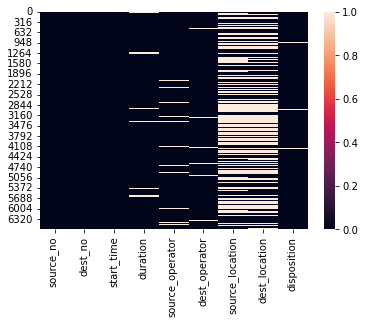

In [65]:
sns.heatmap(df.isnull());

In [110]:
df.head()

,source_no,dest_no,start_time,duration,source_operator,dest_operator,source_location,dest_location,disposition
0,5211000060288,2515848475689,2021-04-01 00:04:23,0.0,Bird PLC,P-Mobile,East Jessica,Davisfurt,busy
1,4740804322253,7494374104405,2021-04-01 02:04:55,6314.0,Martinez LLC,P-Mobile,Murphyshire,NaN,answered
2,7812864966094,6905951712087,2021-04-01 00:04:04,864.0,NaN,P-Mobile,New Courtney,North Justin,answered
3,3379235991311,7157599245885,2021-04-01 01:04:18,804.0,P-Mobile,Martinez LLC,New Williamfurt,Morganview,answered
4,6307191134665,8448277744991,2021-04-01 02:04:26,1449.0,Gardner Inc,P-Mobile,Kristenside,Lake Lynnton,answered


In [129]:
client = bigquery.Client()
table_id = 'acn-in-cf-data-ggl-aca-c01-t04.test1.CDR_special1'
job_config = bigquery.LoadJobConfig(write_disposition='WRITE_TRUNCATE', autodetect = True)

load_job = client.load_table_from_dataframe(df, table_id, job_config=job_config)  # Make an API request.
print('test')
load_job.result()
print("SUCCESS ")

test
SUCCESS 
